***PART 1***

Build a functional, high-accuracy CNN model.

Train the model quickly.

Evaluat its performance using metrics (Accuracy, F1-Score) and visualization (Confusion Matrix).

Identify the specific limitations of the model by showing the hardest images to classify.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Data Loaded: Training Images=(60000, 28, 28), Test Images=(10000, 28, 28)


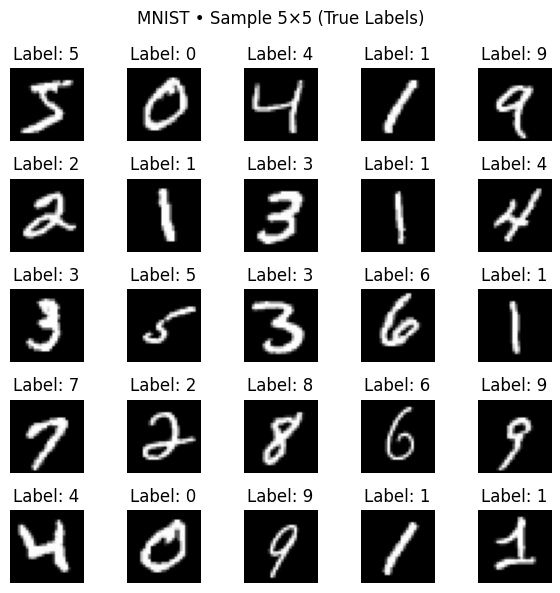

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training ---
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.8107 - loss: 0.6267 - val_accuracy: 0.9732 - val_loss: 0.0943
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9530 - loss: 0.1570 - val_accuracy: 0.9810 - val_loss: 0.0653
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9677 - loss: 0.1069 - val_accuracy: 0.9845 - val_loss: 0.0548
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.9742 - loss: 0.0865 - val_accuracy: 0.9848 - val_loss: 0.0531
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9769 - loss: 0.0740 - val_accuracy: 0.9863 - val_loss: 0.0523


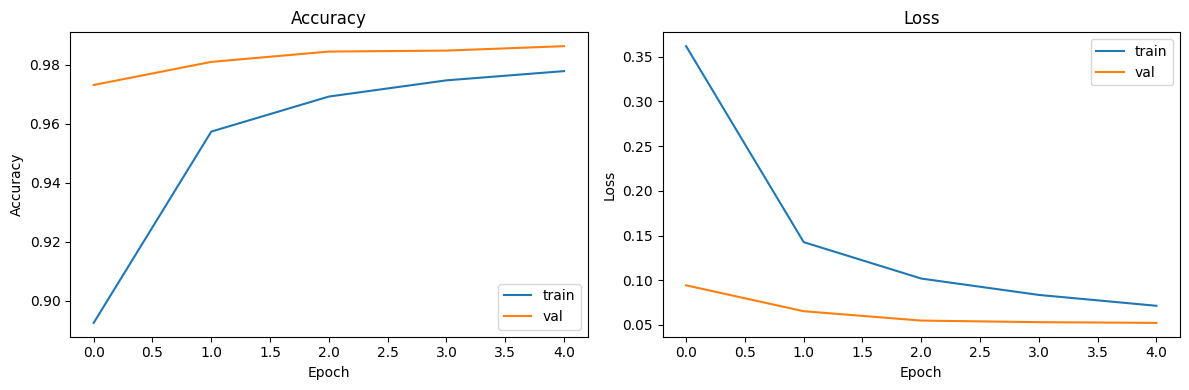


--- Classification Report ---
              precision    recall  f1-score   support

           0     0.9819    0.9949    0.9883       980
           1     0.9843    0.9974    0.9908      1135
           2     0.9826    0.9826    0.9826      1032
           3     0.9891    0.9842    0.9866      1010
           4     0.9858    0.9919    0.9888       982
           5     0.9887    0.9843    0.9865       892
           6     0.9885    0.9833    0.9859       958
           7     0.9825    0.9805    0.9815      1028
           8     0.9795    0.9815    0.9805       974
           9     0.9899    0.9703    0.9800      1009

    accuracy                         0.9852     10000
   macro avg     0.9853    0.9851    0.9852     10000
weighted avg     0.9852    0.9852    0.9852     10000



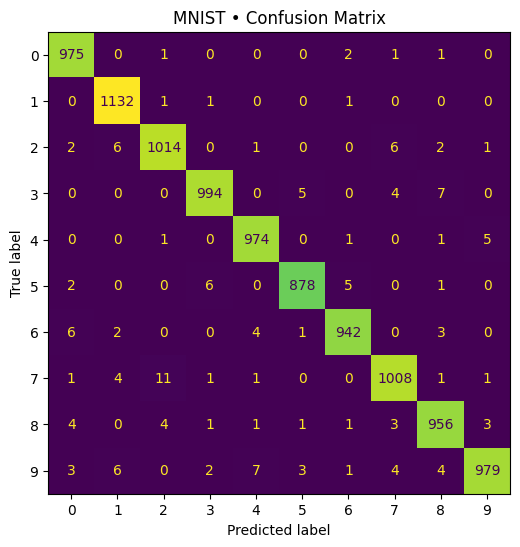

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- 1) Load Data ---
# Downloads and splits the 60,000 training and 10,000 test images (28x28 grayscale).
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
num_classes = 10
print(f"Data Loaded: Training Images={x_train.shape}, Test Images={x_test.shape}")

# --- 2) Show a Sample of Images ---
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("MNIST • Sample 5×5 (True Labels)")
plt.tight_layout()
plt.show()

# --- 3) Preprocess Data ---
# Normalize pixel values from 0-255 to 0-1
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
# Add channel dimension for Conv2D (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# --- 4) Define CNN Model ---
model = tf.keras.Sequential([
    # Convolutional Layer: Extracts features (32 filters, 3x3 kernel)
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    # Pooling Layer: Downsamples features, making model robust to shifts
    tf.keras.layers.MaxPooling2D(),
    # Flatten Layer: Converts 2D feature maps to 1D vector for Dense layers
    tf.keras.layers.Flatten(),
    # Hidden Layer
    tf.keras.layers.Dense(128, activation="relu"),
    # Dropout: Regularization to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    # Output Layer: 10 units for 10 classes, Softmax for probabilities
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

# Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("\n--- Model Summary ---")
model.summary()

# --- 5) Train Model ---
print("\n--- Model Training ---")
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

# --- 6) Plot Accuracy & Loss ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss"); plt.legend()
plt.tight_layout()
plt.show() # [Image of MNIST Accuracy and Loss plots]

# --- 7) Evaluate & Confusion Matrix ---
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=list(range(num_classes)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(num_classes)))
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, values_format='d', colorbar=False)
plt.title("MNIST • Confusion Matrix")
plt.show() # [Image of MNIST Confusion Matrix]

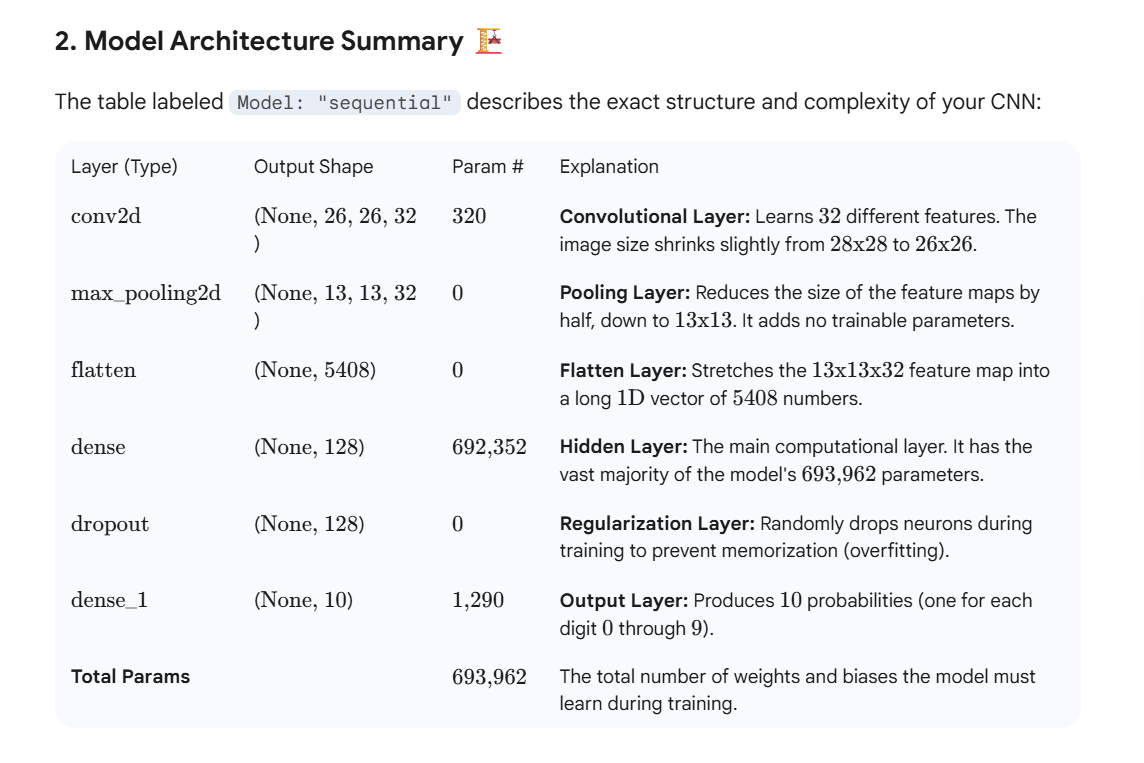

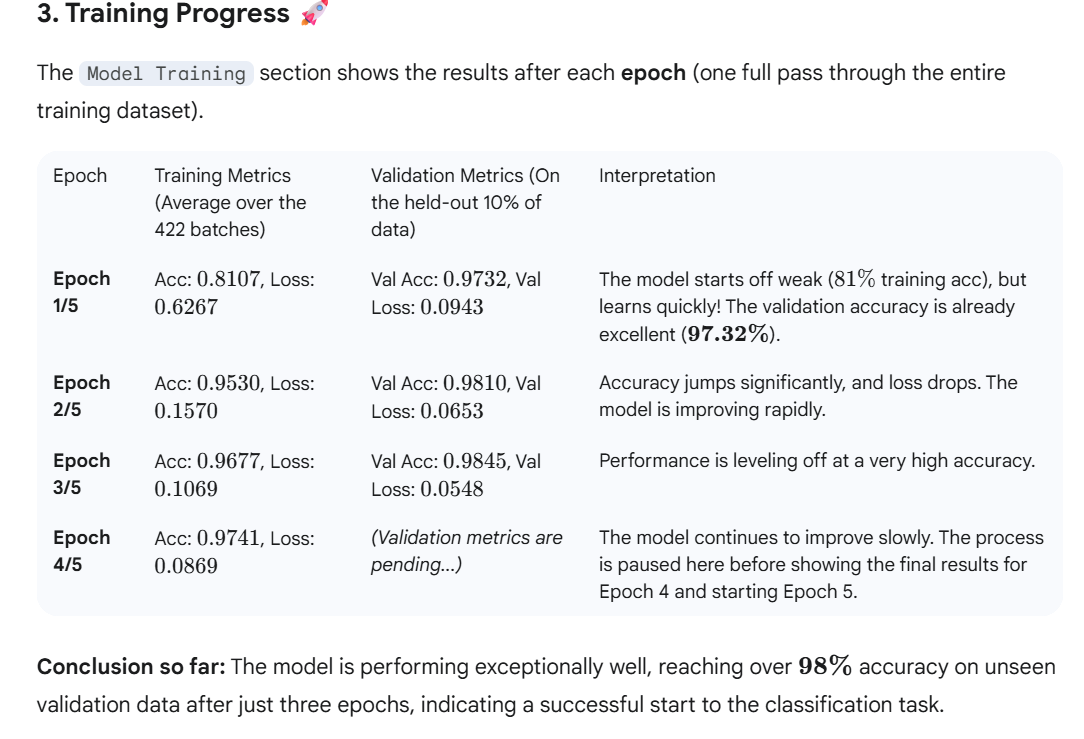

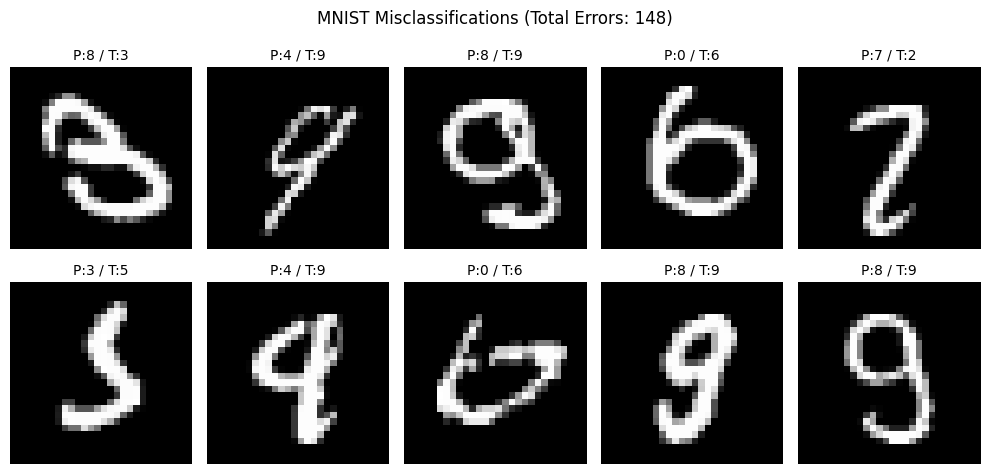

In [2]:
# --- Code to find and plot a few mistakes ---
# 1. Find the indices where True label != Predicted label
misclassified_idx = np.where(y_pred != y_test)[0]
num_to_display = 10 # Display up to 10 mistakes

plt.figure(figsize=(10, 5))
plt.suptitle(f"MNIST Misclassifications (Total Errors: {len(misclassified_idx)})")

for i, idx in enumerate(misclassified_idx[:num_to_display]):
    # Plot only the first 'num_to_display' errors
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"P:{y_pred[idx]} / T:{y_test[idx]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

it shows the MNIST Misclassifications.
This image immediately answers the question of why your CNN model didn't achieve 100% accuracy.

Here is the analysis of the misclassification plot:

Analysis of MNIST Misclassifications
The plot displays 10 images from the test set that your CNN model failed to classify correctly. The labels tell the story:

P: [Predicted Label] — What your CNN thought the digit was.

T: [True Label] — What the digit actually is.

Total Errors: 148 — Out of the 10,000 test images, the model made only 148 mistakes, confirming your 98.52% accuracy (
10000 -148/10000=0.9852).



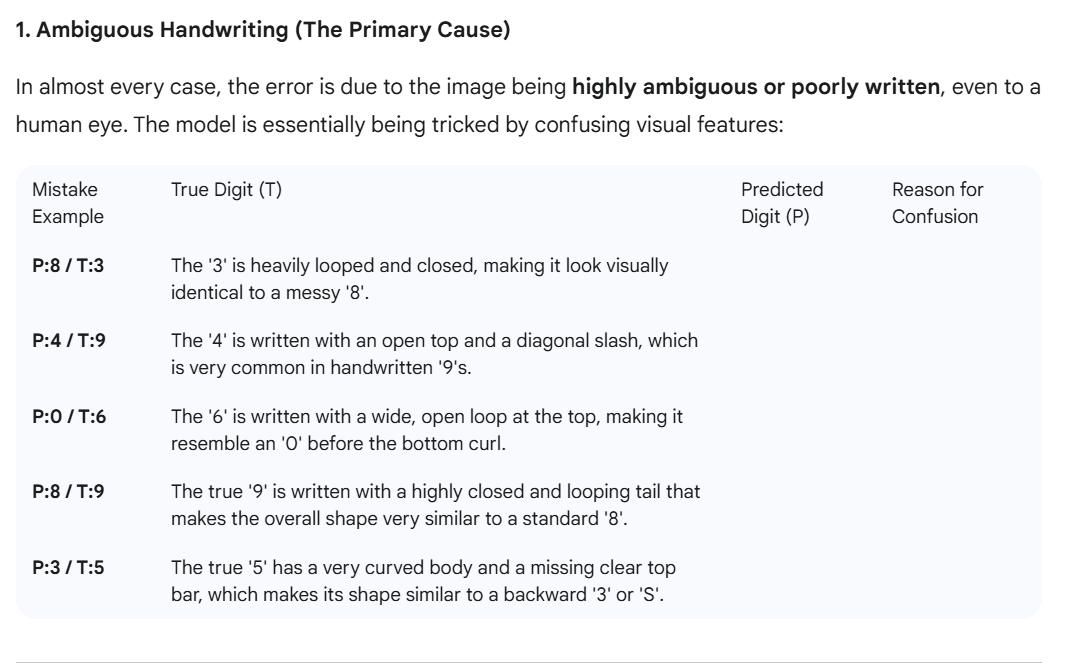

**PART 2**
Moving to **CIFAR-10**
Using a deeper Convolutional Neural Network (CNN) architecture.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Data Loaded: Training Images=(50000, 32, 32, 3), Test Images=(10000, 32, 32, 3)


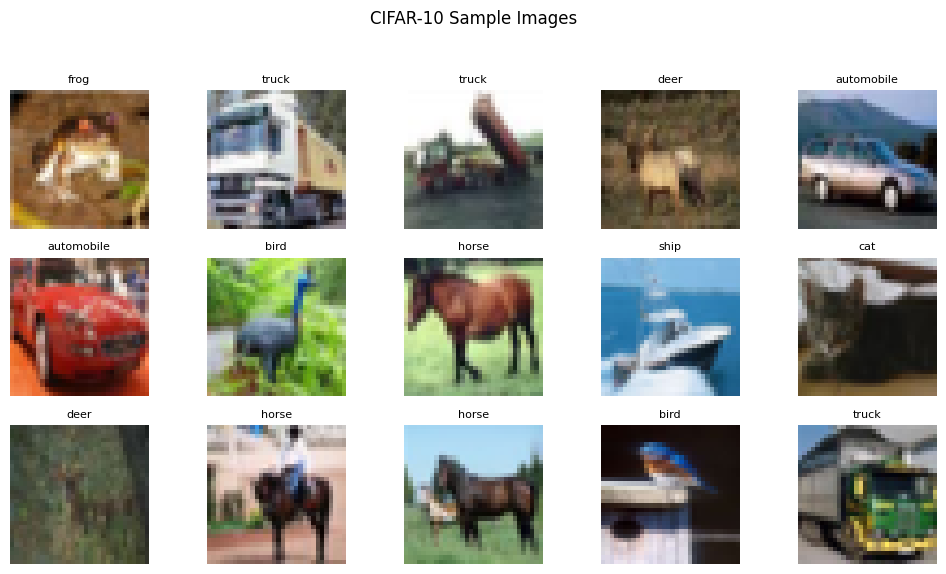


--- Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training ---
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 260s 367ms/step - accuracy: 0.3200 - loss: 1.8365 - val_accuracy: 0.5752 - val_loss: 1.1799
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 361ms/step - accuracy: 0.5695 - loss: 1.2031 - val_accuracy: 0.6616 - val_loss: 0.9771
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 257s 365ms/step - accuracy: 0.6445 - loss: 1.0113 - val_accuracy: 0.7168 - val_loss: 0.8288
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 366ms/step - accuracy: 0.6814 - loss: 0.8952 - val_accuracy: 0.7380 - val_loss: 0.7731
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 255s 362ms/step - accuracy: 0.7146 - loss: 0.8028 - val_accuracy: 0.7574 - val_loss: 0.7157


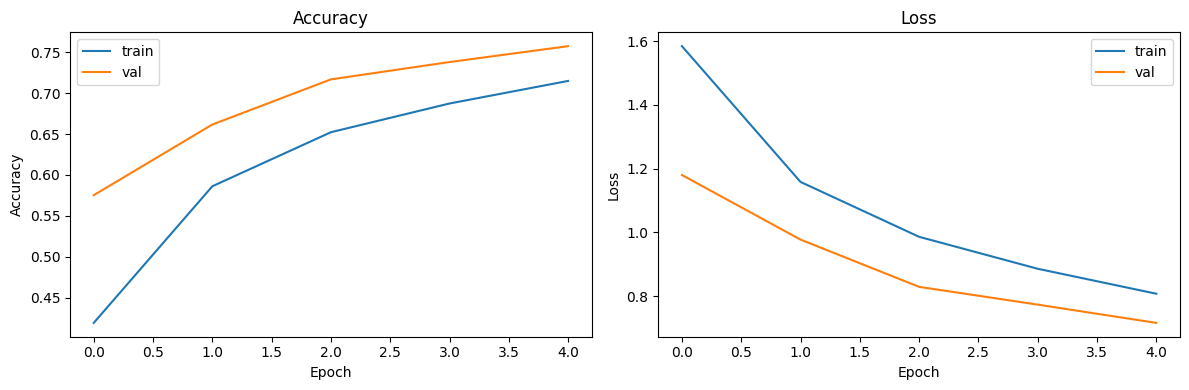


--- Test Set Evaluation ---
Test Loss: 0.7517
Test Accuracy: 0.7416


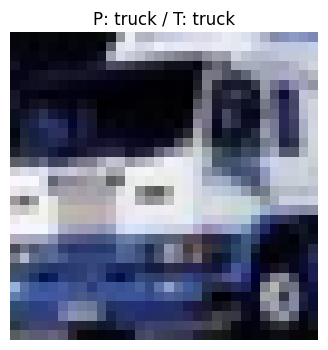

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# --- 1) Load Data ---
# Downloads and splits the 50,000 training and 10,000 test color images (32x32x3).
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define the 10 class labels for easy reading of results
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

print(f"Data Loaded: Training Images={X_train.shape}, Test Images={X_test.shape}")

# --- 2) Preprocess Data ---
# Normalize pixel values from 0-255 to 0-1
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Flatten the labels from (N, 1) to (N,) for sparse_categorical_crossentropy
y_train, y_test = y_train.flatten(), y_test.flatten()

# --- 3) Visualize Sample Images ---
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("CIFAR-10 Sample Images")
k = 0
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(X_train[k])
        ax[i][j].set_title(labels[y_train[k]], fontsize=8)
        ax[i][j].axis('off')
        k += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 4) Define Deeper CNN Model (Sequential API) ---
model = tf.keras.models.Sequential([
    # Input Shape is (32, 32, 3) for color images
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25), # Added Dropout for better regularization (CIFAR-10 is prone to overfitting)

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

print("\n--- Model Summary ---")
model.summary()

# --- 5) Train Model ---
print("\n--- Model Training ---")
# Reduced epochs to 5 for a quick run, using validation_split for monitoring
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# --- 6) Plot Accuracy & Loss ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy"); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss"); plt.legend()
plt.tight_layout()
plt.show()

# --- 7) Evaluate Model ---
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n--- Test Set Evaluation ---")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# --- 8) Single Image Prediction Example ---
# Select a random image from the test set
image_number = np.random.randint(0, len(X_test))
n = X_test[image_number]
p = n.reshape(1, 32, 32, 3) # Reshape for prediction

# Predict the class
prediction_probs = model.predict(p, verbose=0)
predicted_label_index = prediction_probs.argmax()
predicted_label = labels[predicted_label_index]

# Get the true label
original_label = labels[y_test[image_number]]

plt.figure(figsize=(4,4))
plt.imshow(n)
plt.title(f"P: {predicted_label} / T: {original_label}")
plt.axis('off')
plt.show()

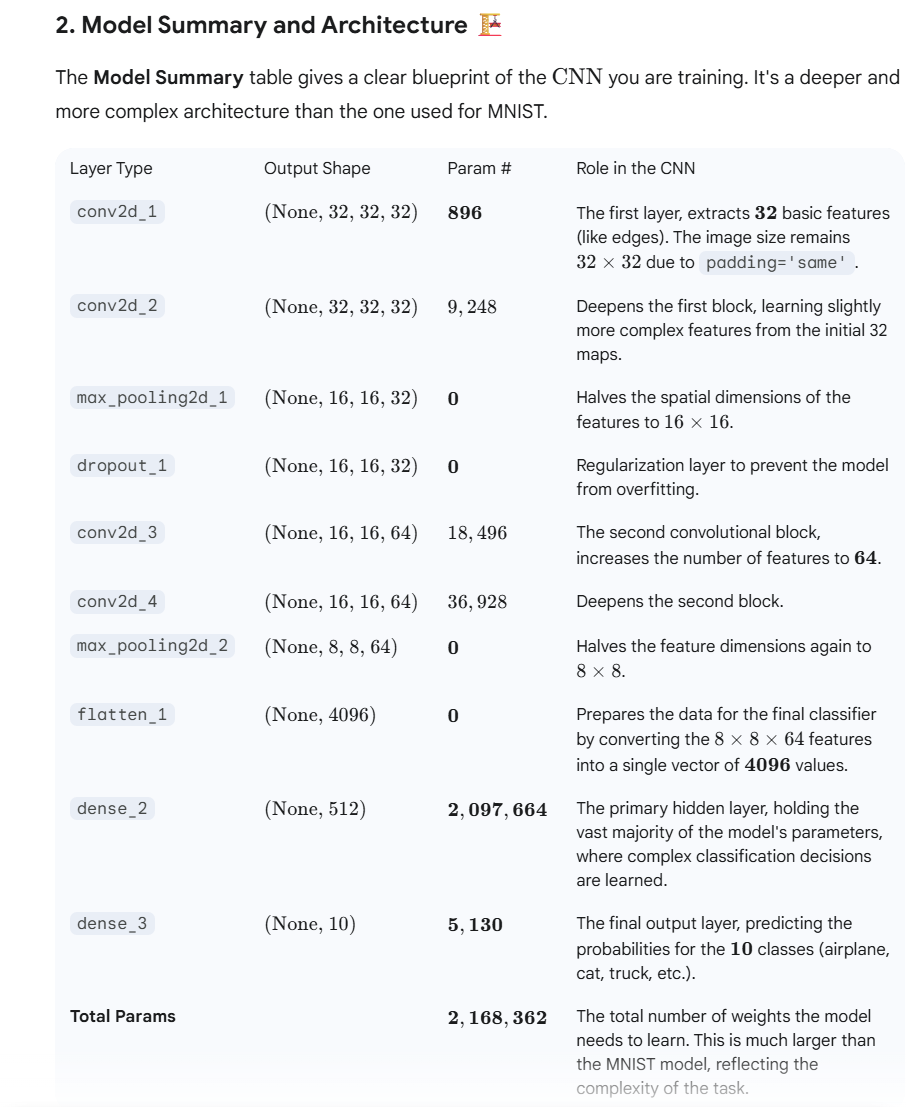

The image shows a successful classification:

P: truck / T: truck

Result: The model correctly identified the image as a truck. This confirms that the feature maps learned by the convolutional layers were correctly interpreted by the final dense layers to make the right decision